In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


#### Load the dataset and scaled the data

In [13]:

# Load FER2013 dataset (replace 'path/to/fer2013.csv' with your actual file path)
df = pd.read_csv('./fer2013.csv')

# Display the first few rows of the dataset
print(df.head())

# Extract image pixels and labels
pixels = df['pixels'].tolist()
labels = df['emotion'].values

# Convert string pixels to numpy arrays
images = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in pixels])

# Reshape the images
images = images.reshape(-1, 48 * 48).astype('float32') / 255.0

# Convert labels to categorical format
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


### Apply traditional Machine learning model

#### Evaluate the model Uisng SVM

In [ ]:

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=50)  # You can choose the number of components based on your requirements
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train an SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

# Predictions
y_pred_train = svm_classifier.predict(X_train_pca)
y_pred_test = svm_classifier.predict(X_test_pca)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy for SVM: {train_accuracy:.2f}')
print(f'Testing Accuracy for SVM: {test_accuracy:.2f}')

#### Evaluate the model Uisng Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_rf = rf_classifier.predict(X_train_scaled)
y_pred_test_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

print(f'Training Accuracy (Random Forest): {train_accuracy_rf:.2f}')
print(f'Testing Accuracy (Random Forest): {test_accuracy_rf:.2f}')


Training Accuracy (Random Forest): 1.00
Testing Accuracy (Random Forest): 0.46


#### Evaluate the model Uisng KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) based on your requirements
knn_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_knn = knn_classifier.predict(X_train_scaled)
y_pred_test_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the KNN model
train_accuracy_knn = accuracy_score(y_train, y_pred_train_knn)
test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

print(f'Training Accuracy (KNN): {train_accuracy_knn:.2f}')
print(f'Testing Accuracy (KNN): {test_accuracy_knn:.2f}')


Training Accuracy (KNN): 0.57
Testing Accuracy (KNN): 0.35


#### Evaluate the perforamance

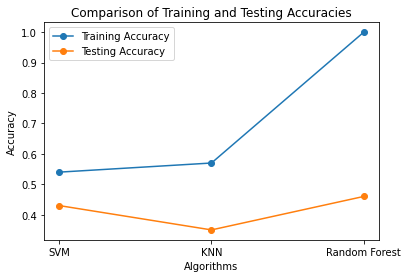

In [11]:
import matplotlib.pyplot as plt

# Provided accuracies for SVM, KNN, and Random Forest
svm_accuracies = [0.54, 0.43]
knn_accuracies = [0.57, 0.35]
rf_accuracies = [1.00, 0.46]

# Labels for the line plot
labels = ['SVM', 'KNN', 'Random Forest']

# Plotting the training accuracies
plt.plot(labels, [svm_accuracies[0], knn_accuracies[0], rf_accuracies[0]], marker='o', label='Training Accuracy')

# Plotting the testing accuracies
plt.plot(labels, [svm_accuracies[1], knn_accuracies[1], rf_accuracies[1]], marker='o', label='Testing Accuracy')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracies')
plt.legend()

# Display the plot
plt.show()

#### Plot the results

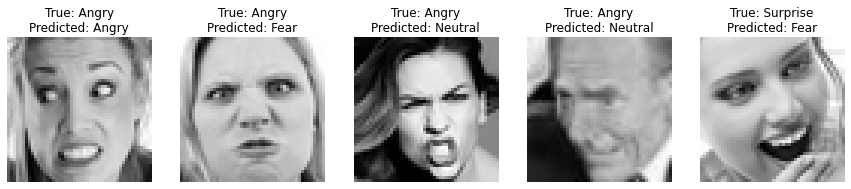

In [17]:
num_images_to_show = 5
selected_indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
selected_images = X_test[selected_indices]
selected_labels_true = y_test[selected_indices]

predictions = knn_classifier.predict(selected_images)
selected_labels_pred = predictions

# Display the images with true and predicted labels
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(15, 8))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(selected_images[i].reshape(48, 48), cmap='gray')
    plt.title(f'True: {class_names[selected_labels_true[i]]}\nPredicted: {class_names[selected_labels_pred[i]]}')
    plt.axis('off')

plt.show()


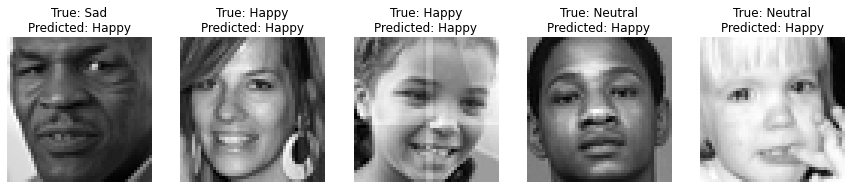

In [25]:
num_images_to_show = 5
selected_indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
selected_images = X_test[selected_indices]
selected_labels_true = y_test[selected_indices]

predictions = rf_classifier.predict(selected_images)
selected_labels_pred = predictions

# Display the images with true and predicted labels
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(15, 8))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(selected_images[i].reshape(48, 48), cmap='gray')
    plt.title(f'True: {class_names[selected_labels_true[i]]}\nPredicted: {class_names[selected_labels_pred[i]]}')
    plt.axis('off')

plt.show()